## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset

In [2]:
cr_data = pd.read_csv('crime_data.csv', index_col=[0])
cr_data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


### Insights of data

In [3]:
cr_data.shape

(50, 4)

In [4]:
cr_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
cr_data.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
cr_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


## EDA

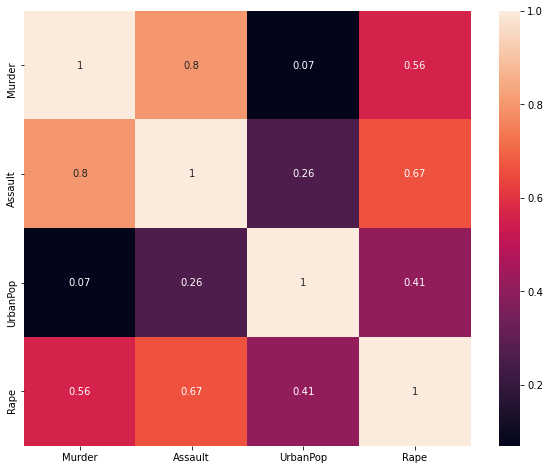

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(cr_data.corr(), annot=True)
plt.show()

* No correlation found in the input features.

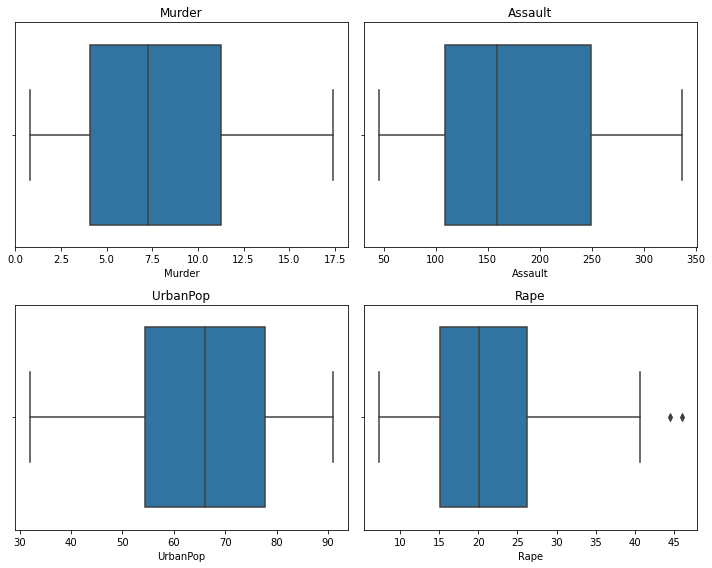

In [8]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.boxplot(x='Murder', data = cr_data)
plt.title('Murder')

plt.subplot(2,2,2)
sns.boxplot(x='Assault', data = cr_data)
plt.title('Assault')

plt.subplot(2,2,3)
sns.boxplot(x='UrbanPop', data = cr_data)
plt.title('UrbanPop')

plt.subplot(2,2,4)
sns.boxplot(x='Rape', data = cr_data)
plt.title('Rape')

plt.tight_layout()

* Observed outliers in the 'Rape' feature.
* Deleting the outliers.

In [9]:
cr_data.drop(cr_data.index[cr_data['Rape']>42], inplace=True)

In [10]:
cr_data.shape

(48, 4)

### Normalizing data

In [11]:
scaler = MinMaxScaler()
cr_std= scaler.fit_transform(cr_data)
cr_std= pd.DataFrame(cr_std, columns=cr_data.columns)
cr_std.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.417417
1,0.439759,0.852740,0.813559,0.711712
2,0.481928,0.496575,0.305085,0.366366
3,0.493976,0.791096,1.000000,1.000000
4,0.427711,0.544521,0.779661,0.942943


# Building Model

## Hierarchical Clustering

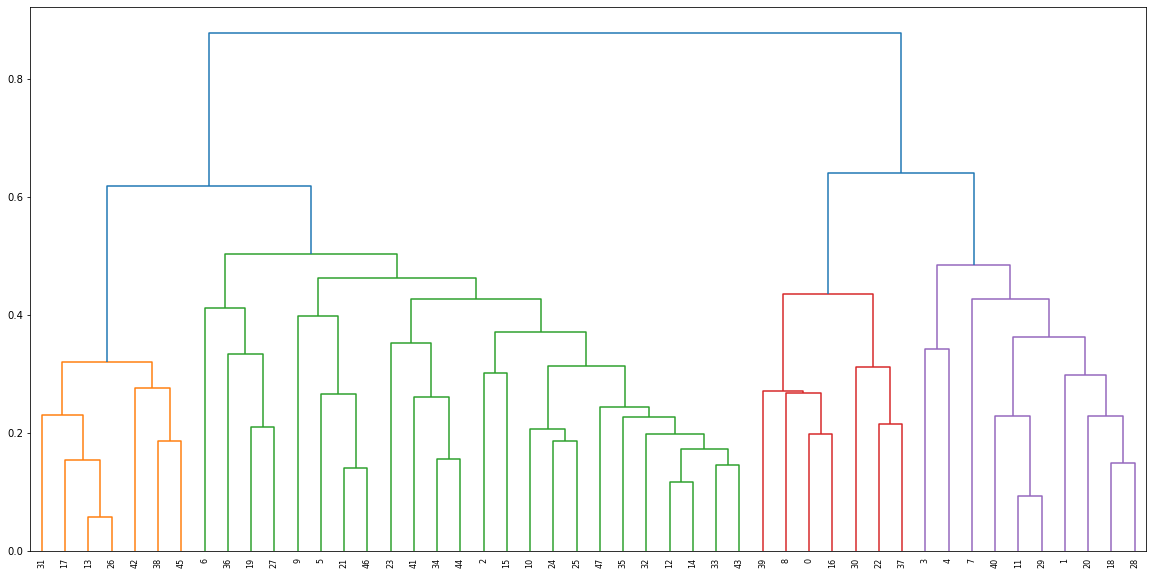

In [12]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(cr_std, method='average'))

##### From dendrogram, we are considering n_clusters = 4 .

In [13]:
hc=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')

#### Fitting model

In [14]:
cr_hc=hc.fit(cr_std)
cr_hc.labels_

array([2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 3, 0, 0, 2, 3, 1, 0, 1, 0,
       2, 0, 0, 0, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0, 3, 0,
       0, 3, 0, 0], dtype=int64)

#### Adding cluster column in the data

In [15]:
cr_data['ClusterID_HC']=cr_hc.labels_
cr_data.head()

,Murder,Assault,UrbanPop,Rape,ClusterID_HC
Alabama,13.2,236,58,21.2,2
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1


#### Grouping Clusters

In [16]:
cr_data.groupby('ClusterID_HC').mean()

,Murder,Assault,UrbanPop,Rape
ClusterID_HC,,,,
0,5.675000,131.458333,68.958333,18.220833
1,10.940000,265.300000,78.900000,31.280000
2,14.671429,251.285714,54.285714,21.685714
3,2.700000,65.142857,46.285714,9.885714


In [17]:
cr_data['ClusterID_HC'].value_counts()

0    24
1    10
2     7
3     7
Name: ClusterID_HC, dtype: int64

#### Calculating 'Silhouette' score

In [18]:
import sklearn
round(sklearn.metrics.silhouette_score(cr_std, cr_hc.labels_),4)

0.3288

## KMeans Clustering

In [19]:
cr_std.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.417417
1,0.439759,0.852740,0.813559,0.711712
2,0.481928,0.496575,0.305085,0.366366
3,0.493976,0.791096,1.000000,1.000000
4,0.427711,0.544521,0.779661,0.942943


In [20]:
cr_data.drop(cr_data.columns[-1], axis=1, inplace=True)
cr_data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


### 'Elbow' Curve

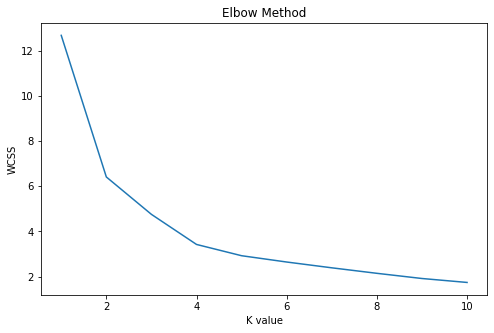

In [21]:
plt.figure(figsize=(8,5))

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=40)
    kmeans.fit(cr_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()
    

From above elbow method curve, we will select K value as '4'.

#### Fitting model

In [22]:
cr_kmeans= KMeans(n_clusters=4, random_state=40)
cr_kmeans.fit(cr_std)

KMeans(n_clusters=4, random_state=40)

In [23]:
cr_kmeans.labels_

array([2, 1, 2, 1, 1, 0, 0, 1, 2, 0, 3, 1, 0, 3, 0, 3, 2, 3, 1, 0, 1, 3,
       2, 1, 3, 3, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0, 3, 0,
       0, 3, 3, 0])

#### Adding Cluster column in the data

In [24]:
cr_data['ClusterID_kmeans'] = cr_kmeans.labels_
cr_data.head()

,Murder,Assault,UrbanPop,Rape,ClusterID_kmeans
Alabama,13.2,236,58,21.2,2
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1


#### Grouping Clusters

In [25]:
cr_data.groupby('ClusterID_kmeans').mean()

,Murder,Assault,UrbanPop,Rape
ClusterID_kmeans,,,,
0,5.656250,138.875000,73.875000,18.781250
1,10.763636,257.363636,78.090909,31.000000
2,13.937500,243.625000,53.750000,21.412500
3,3.600000,78.538462,52.076923,12.176923


In [26]:
cr_data['ClusterID_kmeans'].value_counts()

0    16
3    13
1    11
2     8
Name: ClusterID_kmeans, dtype: int64

#### Calculating 'Silhouette' Score

In [27]:
import sklearn
round(sklearn.metrics.silhouette_score(cr_std, cr_kmeans.labels_), 4)

0.344

# DBSCAN 

* In this method, we need epsilon value & minimum points.

* Minimum samples > = 4

* And we will consider some epsilon value. Let's say 0.5.

In [28]:
cr_std.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.417417
1,0.439759,0.852740,0.813559,0.711712
2,0.481928,0.496575,0.305085,0.366366
3,0.493976,0.791096,1.000000,1.000000
4,0.427711,0.544521,0.779661,0.942943


In [29]:
cr_data.drop(cr_data.columns[-1], axis=1, inplace=True)
cr_data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


### Fitting model

In [30]:
cr_dbscan = DBSCAN(eps=0.5, min_samples=4)
cr_dbscan.fit(cr_std)

DBSCAN(min_samples=4)

In [31]:
cr_dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

* Here only one cluster formed with one outlier with epslion value 0.5.

* Have to try diffrent epsilon values to get proper clustering with the help of DBSCAN.

In [32]:
cr_dbscan_1 = DBSCAN(eps=0.28, min_samples=4)
cr_dbscan_1.fit(cr_std)

DBSCAN(eps=0.28, min_samples=4)

In [33]:
cr_dbscan_1.labels_

array([ 0,  2,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  0,
        1,  2,  1,  2,  1, -1,  1,  1,  1,  1,  1,  2, -1, -1,  1,  1,  1,
        1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

#### Adding cluster column in data

In [34]:
cr_data['Cluster ID']=cr_dbscan_1.labels_
cr_data.head()

,Murder,Assault,UrbanPop,Rape,Cluster ID
Alabama,13.2,236,58,21.2,0
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,-1
Colorado,7.9,204,78,38.7,-1


#### Grouping clusters

In [35]:
cr_data.groupby('Cluster ID').mean()

,Murder,Assault,UrbanPop,Rape
Cluster ID,,,,
-1,11.290909,237.272727,72.909091,25.618182
0,14.050000,238.000000,57.750000,23.200000
1,4.962069,114.724138,62.896552,16.224138
2,10.725000,283.500000,72.750000,31.500000


In [36]:
cr_data['Cluster ID'].value_counts()

 1    29
-1    11
 0     4
 2     4
Name: Cluster ID, dtype: int64

#### Calculating 'Silhouette' score

In [37]:
import sklearn
round(sklearn.metrics.silhouette_score(cr_std, cr_dbscan_1.labels_),4)

0.1969

## Conclusion

#### Silhouette Score:
    * Hierarchical Clustering  :  0.329
    * KMeans                   :  0.344
    * DBSCAN                   :  0.197
    
#### From this , we can conclude that KMeans technique is giving highest 'Silhouette score', so we will consider KMeans for further predictions. 